## Convolutional Neural Networks for image classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Visualizing the image data

In [8]:
single_image=x_train[6]

In [6]:
single_image.shape

(28, 28)

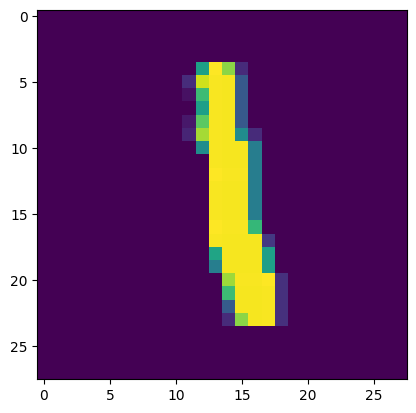

In [9]:
plt.imshow(single_image)

## Preprocessing Data

In [ ]:
# the output is between 0 to 9.when we train the dataset,it 
# would think that it is a regression problem ,so that we are 
# changing the output to the categorical form

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example=to_categorical(y_train)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
y_cat_test =to_categorical(y_test,10)

In [16]:
y_cat_train=to_categorical(y_train,10)

## Normalization of the Data

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

In [19]:
x_train=x_train/255
x_test=x_test/255

# Reshaping of data

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_train=x_train.reshape(60000, 28, 28,1)

In [22]:
x_test=x_test.reshape(10000,28,28,1)

## Training the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [25]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [30]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9182 - loss: 0.2799 - val_accuracy: 0.9829 - val_loss: 0.0539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0469 - val_accuracy: 0.9844 - val_loss: 0.0455
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9828 - val_loss: 0.0531
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9861 - val_loss: 0.0403
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9871 - val_loss: 0.0430
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9895 - val_loss: 0.0369
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9887 - val_loss: 0.0404
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9982 - loss: 0.0055 - 

## Evaluate the Model

In [31]:
model.metrics_names

['loss', 'compile_metrics']

In [32]:
losses=pd.DataFrame(model.history.history)

In [33]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.959417,0.138516,0.9829,0.053948
1,0.985150,0.048187,0.9844,0.045510
2,0.989700,0.031624,0.9828,0.053144
3,0.992933,0.021807,0.9861,0.040288
4,0.995567,0.014392,0.9871,0.042985


<Axes: >

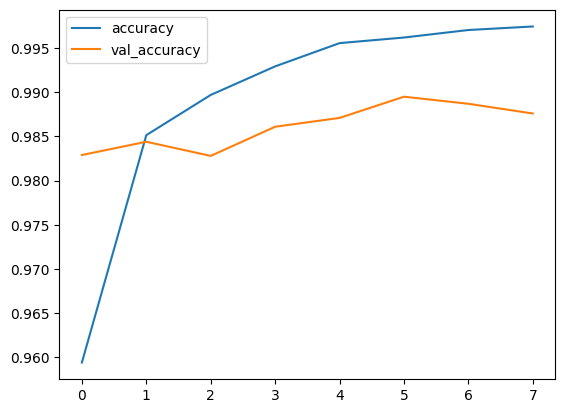

In [34]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

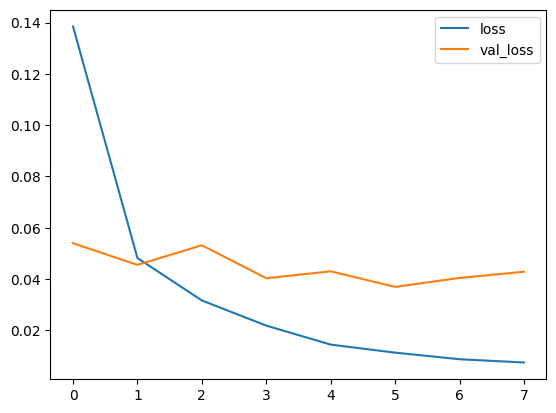

In [35]:
losses[['loss','val_loss']].plot()

In [36]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.042826686054468155, 0.9876000285148621]


In [37]:
x_test[0].shape

(28, 28, 1)

In [38]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
y_test.shape

(10000,)

In [46]:
predictions[8]

array([2.7066802e-05, 7.1172269e-12, 4.5366155e-09, 4.2047905e-06,
       7.9033744e-06, 9.6171057e-01, 2.9703025e-02, 1.7945365e-12,
       8.5100019e-03, 3.7180565e-05], dtype=float32)

In [58]:
predicted_class = np.argmax(predictions,axis=1)
print(predicted_class)

[7 2 1 ... 4 5 6]


In [60]:
predictions.shape

(10000, 10)

In [61]:
predicted_class.shape

(10000,)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [63]:
confusion_matrix(y_test,predicted_class)

array([[ 975,    1,    1,    1,    0,    0,    2,    0,    0,    0],
       [   0, 1126,    2,    1,    0,    2,    1,    1,    2,    0],
       [   2,    0, 1026,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    0, 1003,    0,    2,    0,    0,    4,    1],
       [   0,    0,    0,    0,  970,    0,    2,    0,    0,   10],
       [   2,    0,    0,    7,    0,  881,    1,    0,    1,    0],
       [   6,    2,    1,    0,    1,    3,  942,    0,    3,    0],
       [   1,    1,    5,    3,    1,    0,    0, 1006,    6,    5],
       [   3,    1,    2,    5,    0,    0,    0,    0,  961,    2],
       [   2,    1,    0,    6,    9,    2,    0,    1,    2,  986]],
      dtype=int64)

In [75]:
my_number = x_test[1]

In [66]:
my_number.shape

(28, 28, 1)

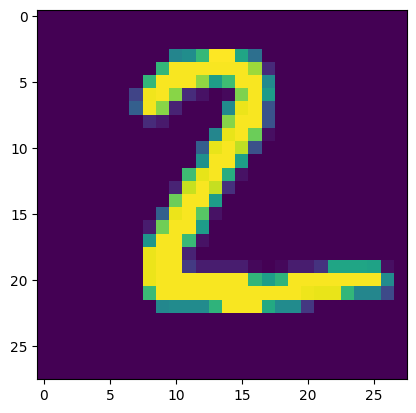

In [76]:
plt.imshow(my_number.reshape(28,28))

In [70]:
model.predict(my_number.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[9.5397943e-12, 8.3952749e-14, 4.4567414e-10, 1.8445789e-08,
        4.3175526e-11, 9.3203646e-13, 5.5523698e-17, 1.0000000e+00,
        5.9996865e-09, 1.6652458e-09]], dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions,axis=1)
print(predicted_class)

In [77]:
# Assuming model.predict(my_number.reshape(1,28,28,1)) gives the following output:
predictions = model.predict(my_number.reshape(1,28,28,1))

# Convert predicted probabilities to class labels
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2


In [74]:
predicted_class

array([7], dtype=int64)